 # Backpropogation 

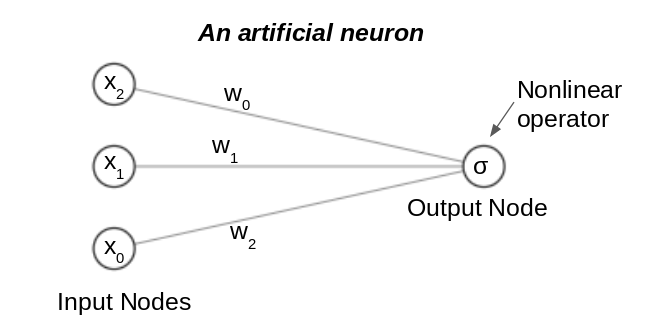

* ### Aritfical Neuron: $$ Output= \sigma(w _0x _0 + w _1x _1 + w _2x _2) $$

  \begin{equation}
 =\sigma\sum_{k=1}^n (w_i x_i) 
  \end{equation}

    * Thus the neuron takes the inputs, multiplies them with the weights and performs a nonlinear operation (sigmoid in  this case) and outputs a singular value.

    * **Important:** A single neuron will always take vector as input and output a singular value

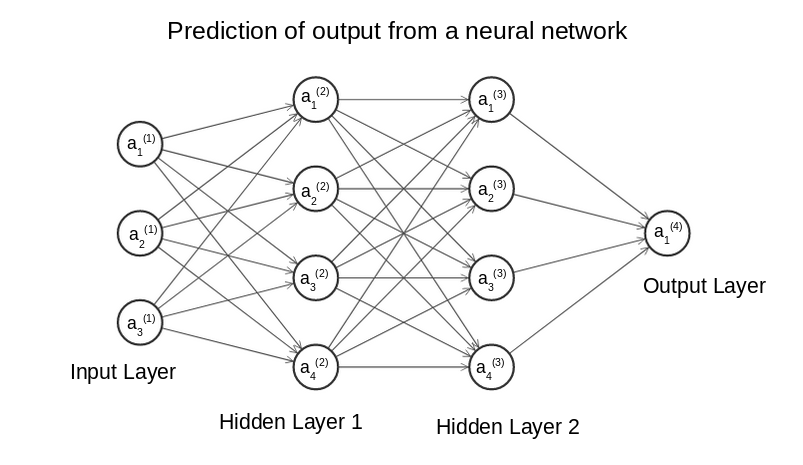

* **A neural network is a huge collection of analytical expressions (linear combinations followed by nonlinear operations)**

    The above statement is of prime importance as this gives backpropogation algorithm the ability to calculate the gradients of loss with respect to weights using the **chain rule**

* ### Weight Determination:

    * Guess weights W
    * For all the given samples, find prediction $ y^i $ from $ x^i $ using W
    * Improve guess by $$W = W - \alpha\frac{\partial E}{\partial W}$$ where **E** is the mean squared error equal to     $$\frac{\sum_{k=1}^n (y_i-y_i^{pred})^2}{2}$$  



* ### Automatic Differentiation:

   Backpropogation uses this method to calculate gradients.

   Two characteristics of **automatic differentiation:**
    * AD uses chain rule
    * AD uses analyical relations between adjacent layers to sequentially calculate contibutions to $\frac{\partial E}{\partial W}$


* # Example of backprop in action (A toy example):
* ### A neural netwrok containg one input, two hidden layers of one neuron each and one output

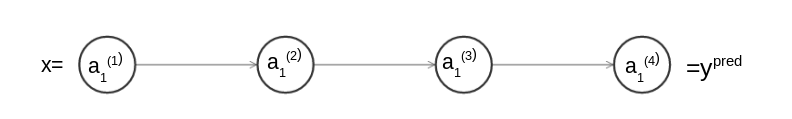

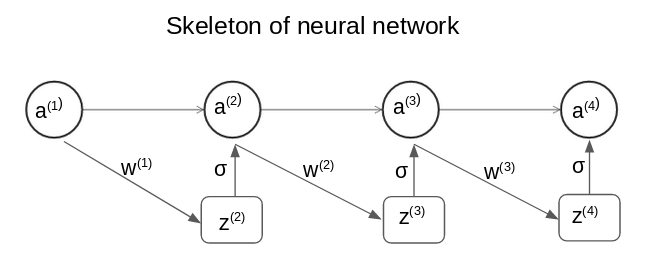

* $a^{(1)}$ is the input node, $a^{(2)}$ & $a^{(3)}$ are hidden nodes and $a^{(4)}$ is the output node
* $z^{(2)}$,$z^{(3)}$,$z^{(4)}$ are the weighted linear combinations

  In this case, $z^{(2)} = w^{(1)}a^{(1)}$, $z^{(3)} = w^{(2)}a^{(2)}$, $z^{(4)} = w^{(3)}a^{(3)}$ respectively
* $a^{(i)}$ is a nonlinear operation on $z^{(i)}: a^{(i)}= \sigma(z^{(i)})$

  **Very important:** All the values of A and Z are known after weight initialisation, these values are used for   calculating gradients and updating the weights.

* ### Calculating the gradients using chain rule:


 $$\frac{\partial E}{\partial w^{(3)}} = \frac{\partial E}{\partial a^{(4)}}\frac{\partial a^{(4)}}{\partial z^{(4)}}\frac{\partial z^{(4)}}{\partial w^{(3)}}\quad\quad  \frac{\partial z^{(4)}}{\partial w^{(3)}} = a^{(3)}$$  
 
 $$\quad\quad\text{Let, }\frac{\partial E}{\partial z^{(4)}} = \delta^{(4)} $$


$$\text{Therefore, }\frac{\partial E}{\partial w^{(3)}} = \delta^{(4)}a^{(3)}$$

  $$\text{Similarly,}\quad\frac{\partial E}{\partial w^{(2)}} = \frac{\partial E}{\partial z^{(3)}}\frac{\partial z^{(3)}}{\partial w^{(2)}} = \delta^{(3)}a^{(2)}$$
  
  
$$\text{Thus, from the chain rule,}\quad\frac{\partial E}{\partial w^{(k)}} = \delta^{(k+1)}a^{(k)}, \quad \text{for any k<=number of layers}.$$

  **Remember,** $$\delta^{(4)} = \frac{\partial E}{\partial z^{(4)}} = (y^{pred}-y^{true})*\sigma'(z^{(4)})$$

 $$\delta^{(3)} = \frac{\partial E}{\partial a^{(4)}}\frac{\partial a^{(4)}}{\partial z^{(4)}}\frac{\partial z^{(4)}}{\partial a^{(3)}}\frac{\partial a^{(3)}}{\partial z^{(3)}} = \delta^{(4)}w^{(3)}\sigma'(z^{(3)})$$

  **Thus in general**, $$\delta^{(k)} = \delta^{(k+1)}w^{(k)}\sigma'(z^{(k)}),\quad\text{for any positive k}$$


* ## For a general neural network

  $w_{ij}^{k}$ denotes weight **connecting node (i) of layer (k) to a node (j) of layer (k+1)**

$$\frac{\partial E}{\partial w_{ij}^{(k)}} = \delta_j^{(k+1)}a_i^{(k)}$$

   where, $$\delta^{(k)} = [W^{(k)}\delta^{(k+1)}].[\sigma'(z^{(k)})],\quad \text{"."here denotes Hadamard product}$$

**Note:** $\delta$, z are vectors, W is a matrix

* ## Full Algorithm Implementation:

    * Initialise **W**
    
    * Forward pass X -> $Y^{pred}$
    
        * Calculate $\delta^{(L)}$ from E analytically. L is the final layer
        
    * $\delta^{(k)} = [W^{(k)}\delta^{(k+1)}].[\sigma'(z^{(k)})],\quad\text{for k= L-1,L-2,...}$
    
    * $\frac{\partial E}{\partial w_{ij}^{(k)}} = \delta_j^{(k+1)}a_i^{(k)}$
    
    * Use W = W -  $\alpha\frac{\partial E}{\partial W}$